Prediction of car prices

Problem Statement

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit 
there and producing cars locally to give competition to their US and European.

They have contracted an automobile consulting company to understand the factors on which the pricing 
of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the 
American market, since those may be very different from the Chinese market.

The company wants to know:
Which variables are significant in predicting the price of a car.
How well those variables describe the price of a car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of 
cars across the Americal market.

Business Goal


You are required to model the price of cars with the available independent variables. It will be used by 
the management to understand how exactly the prices vary with the independent variables. They can accordingly 
manipulate the design of the cars, the business strategy etc. to meet certain price levels.
Further, the model will be a good way for management to understand the pricing dynamics of a new market.

In [140]:
import pandas as pd
df=pd.read_csv("D:\SANKHYANA\Practise Data\Car_Price_prediction.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [141]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [142]:
data=df.drop(["car_ID"],axis=1)
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [143]:
data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [144]:
import string
for i in string.punctuation:
    puncts=data.astype(str)==str(i)
    print(puncts.sum(),i)

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64 !
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio 

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

# Univariant Analysis

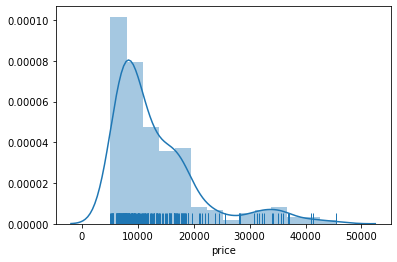

In [146]:
import seaborn as sns
sns.distplot(data["price"],kde=True,hist=True,rug=True)

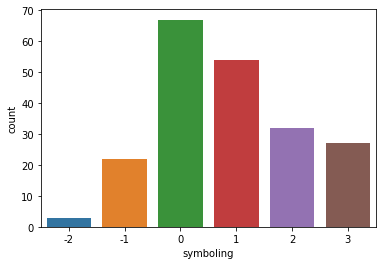

In [147]:
import seaborn as sns
sns.countplot(data["symboling"])

Text(0, 0.5, 'Avg_price')

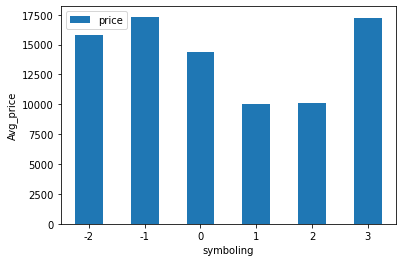

In [148]:
import matplotlib.pyplot as plt
data[["symboling","price"]].groupby("symboling").mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("symboling")
plt.ylabel("Avg_price")

In [149]:
data['brand'] = data.CarName.str.split(' ').str.get(0).str.upper()


In [150]:
len(set(data["brand"]))

27

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 <a list of 27 Text major ticklabel objects>)

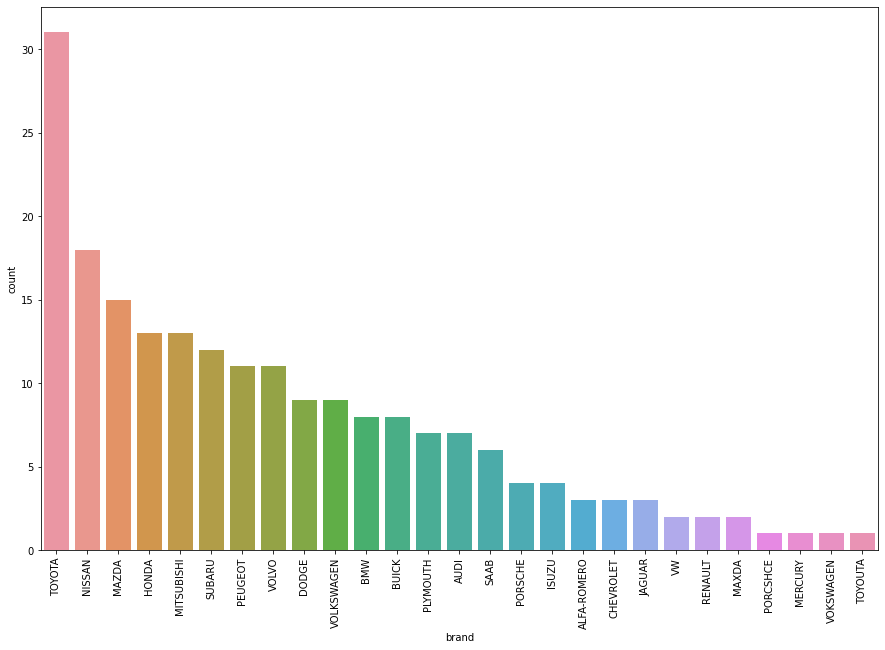

In [151]:
fig=plt.figure(figsize=(15,10))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index)
plt.xticks(rotation=90)

In [152]:
# It's noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.
data['brand'] = data['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
data['brand'] = data['brand'].replace(['MAXDA'], 'MAZDA')
data['brand'] = data['brand'].replace(['PORCSHCE'], 'PORSCHE')
data['brand'] = data['brand'].replace(['TOYOUTA'], 'TOYOTA')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

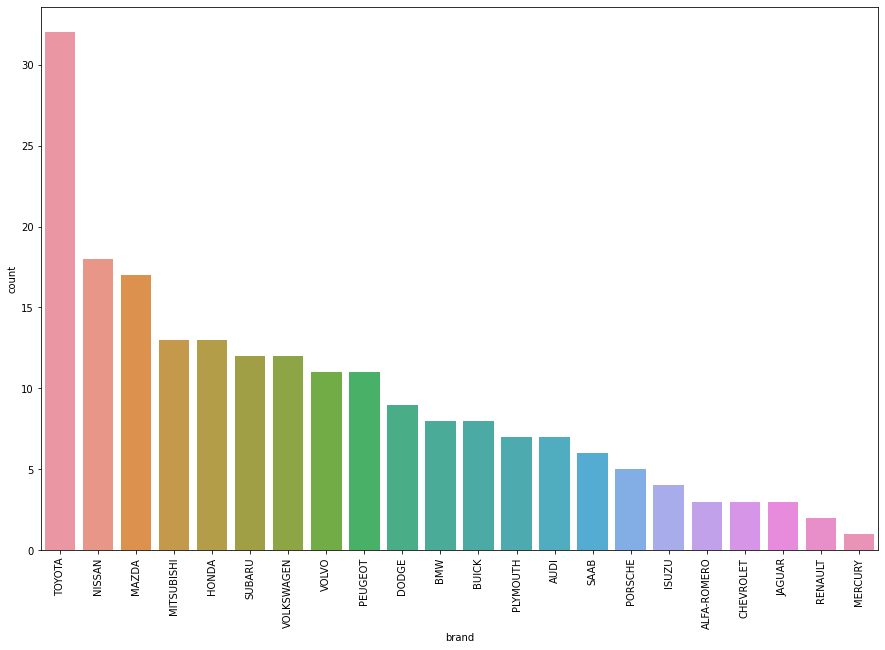

In [153]:
fig=plt.figure(figsize=(15,10))
plt1 = sns.countplot(data['brand'], order=pd.value_counts(data['brand']).index)
plt.xticks(rotation=90)

Text(0, 0.5, 'Avg_price')

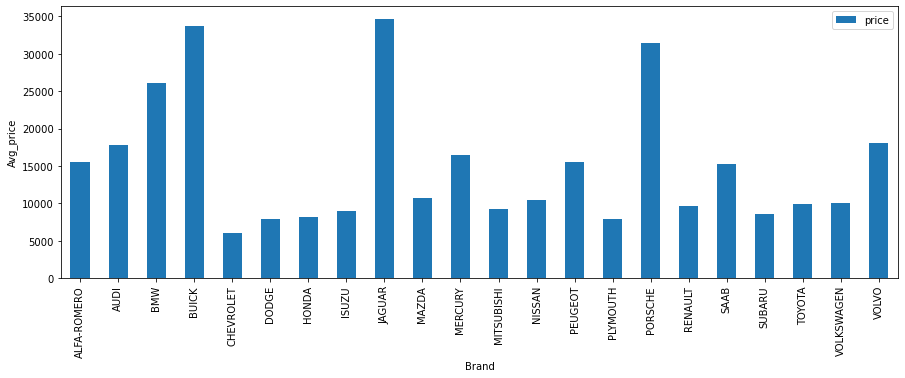

In [154]:

brand_prices=data[["brand","price"]].groupby("brand").mean()
brand_prices.plot(kind="bar",figsize=(15,5))
plt.xlabel("Brand")
plt.ylabel("Avg_price")

In [155]:
data.brand

0      ALFA-ROMERO
1      ALFA-ROMERO
2      ALFA-ROMERO
3             AUDI
4             AUDI
          ...     
200          VOLVO
201          VOLVO
202          VOLVO
203          VOLVO
204          VOLVO
Name: brand, Length: 205, dtype: object

In [156]:
data=data.merge(brand_prices,on="brand")
data=data.rename(columns={"price_x":"price","price_y":"Brand_Price"})

In [157]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,Brand_Price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,15498.333333
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,15498.333333
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,15498.333333
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950.0,AUDI,17859.166714
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450.0,AUDI,17859.166714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845.0,VOLVO,18063.181818
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045.0,VOLVO,18063.181818
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485.0,VOLVO,18063.181818
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470.0,VOLVO,18063.181818


In [158]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand',
       'Brand_Price'],
      dtype='object')

In [159]:
data['brand_category'] = data['Brand_Price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))


In [160]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,Brand_Price,brand_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,15498.333333,Mid_Range
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,17859.166714,Mid_Range
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845.0,VOLVO,18063.181818,Mid_Range
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045.0,VOLVO,18063.181818,Mid_Range
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485.0,VOLVO,18063.181818,Mid_Range
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470.0,VOLVO,18063.181818,Mid_Range


Text(0, 0.5, 'Avg_Price')

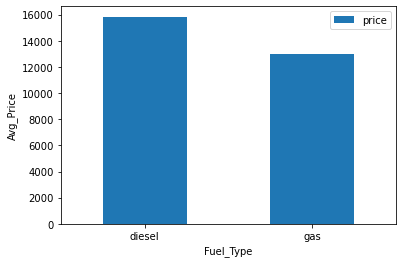

In [161]:
data[["fueltype","price"]].groupby("fueltype").mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Fuel_Type")
plt.ylabel("Avg_Price")

Text(0, 0.5, 'Avg_price')

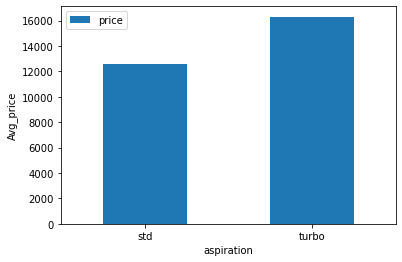

In [162]:
data[["aspiration","price"]].groupby("aspiration").mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("aspiration")
plt.ylabel("Avg_price")

Text(0, 0.5, 'Avg_price')

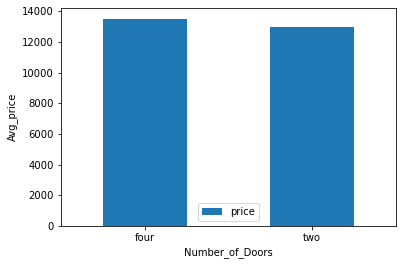

In [163]:
data[['doornumber','price']].groupby("doornumber").mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Number_of_Doors")
plt.ylabel("Avg_price")

Text(0, 0.5, 'Avg_Price')

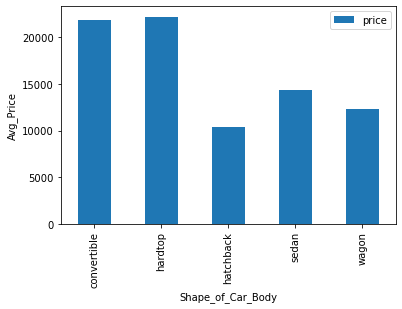

In [164]:
data[['carbody','price']].groupby("carbody").mean().plot(kind="bar")
plt.xlabel("Shape_of_Car_Body")
plt.ylabel("Avg_Price")

Text(0, 0.5, 'Avg_price')

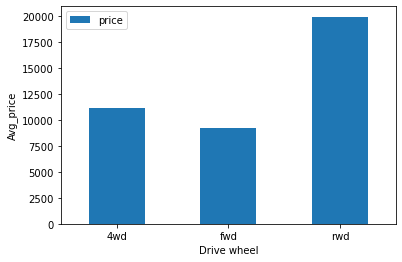

In [165]:
data[['drivewheel','price']].groupby("drivewheel").mean().plot(kind="bar")
plt.xticks(rotation=0)
plt.xlabel("Drive wheel")
plt.ylabel("Avg_price")

Text(0, 0.5, 'Price')

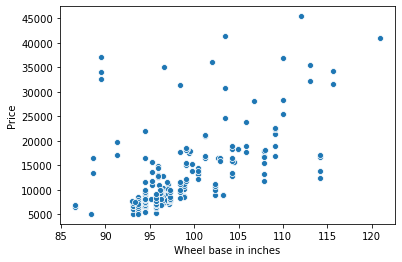

In [166]:
plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = df)
plt1.set_xlabel("Wheel base in inches")
plt1.set_ylabel("Price")

In [167]:
data

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,brand,Brand_Price,brand_category
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,13495.0,ALFA-ROMERO,15498.333333,Mid_Range
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,2.68,9.0,111,5000,21,27,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,3.47,9.0,154,5000,19,26,16500.0,ALFA-ROMERO,15498.333333,Mid_Range
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,3.40,10.0,102,5500,24,30,13950.0,AUDI,17859.166714,Mid_Range
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,3.40,8.0,115,5500,18,22,17450.0,AUDI,17859.166714,Mid_Range
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,3.15,9.5,114,5400,23,28,16845.0,VOLVO,18063.181818,Mid_Range
201,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,3.15,8.7,160,5300,19,25,19045.0,VOLVO,18063.181818,Mid_Range
202,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,2.87,8.8,134,5500,18,23,21485.0,VOLVO,18063.181818,Mid_Range
203,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,3.40,23.0,106,4800,26,27,22470.0,VOLVO,18063.181818,Mid_Range


In [168]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand',
       'Brand_Price', 'brand_category'],
      dtype='object')

Text(0, 0.5, 'Price of Car (Dollars)')

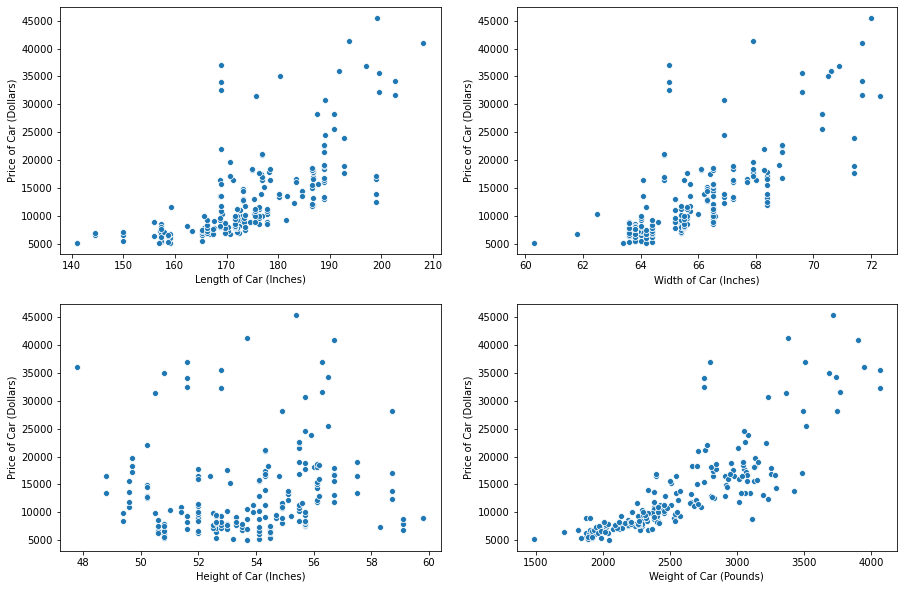

In [169]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = df, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = df, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = df, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = df, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')

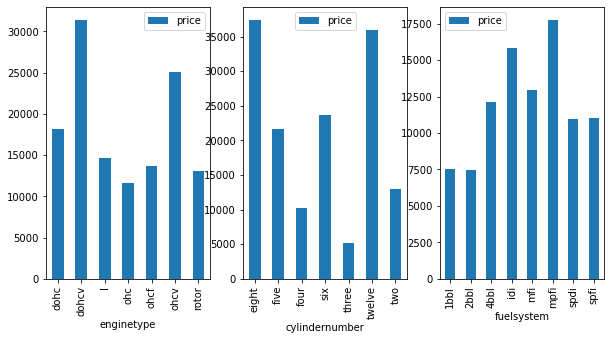

In [170]:
fig, axs = plt.subplots(1,3,figsize=(10,5))
data[['enginetype','price']].groupby("enginetype").mean().plot(kind="bar",ax=axs[0])
data[['cylindernumber','price']].groupby("cylindernumber").mean().plot(kind="bar",ax=axs[1])
data[['fuelsystem','price']].groupby("fuelsystem").mean().plot(kind="bar",ax=axs[2])

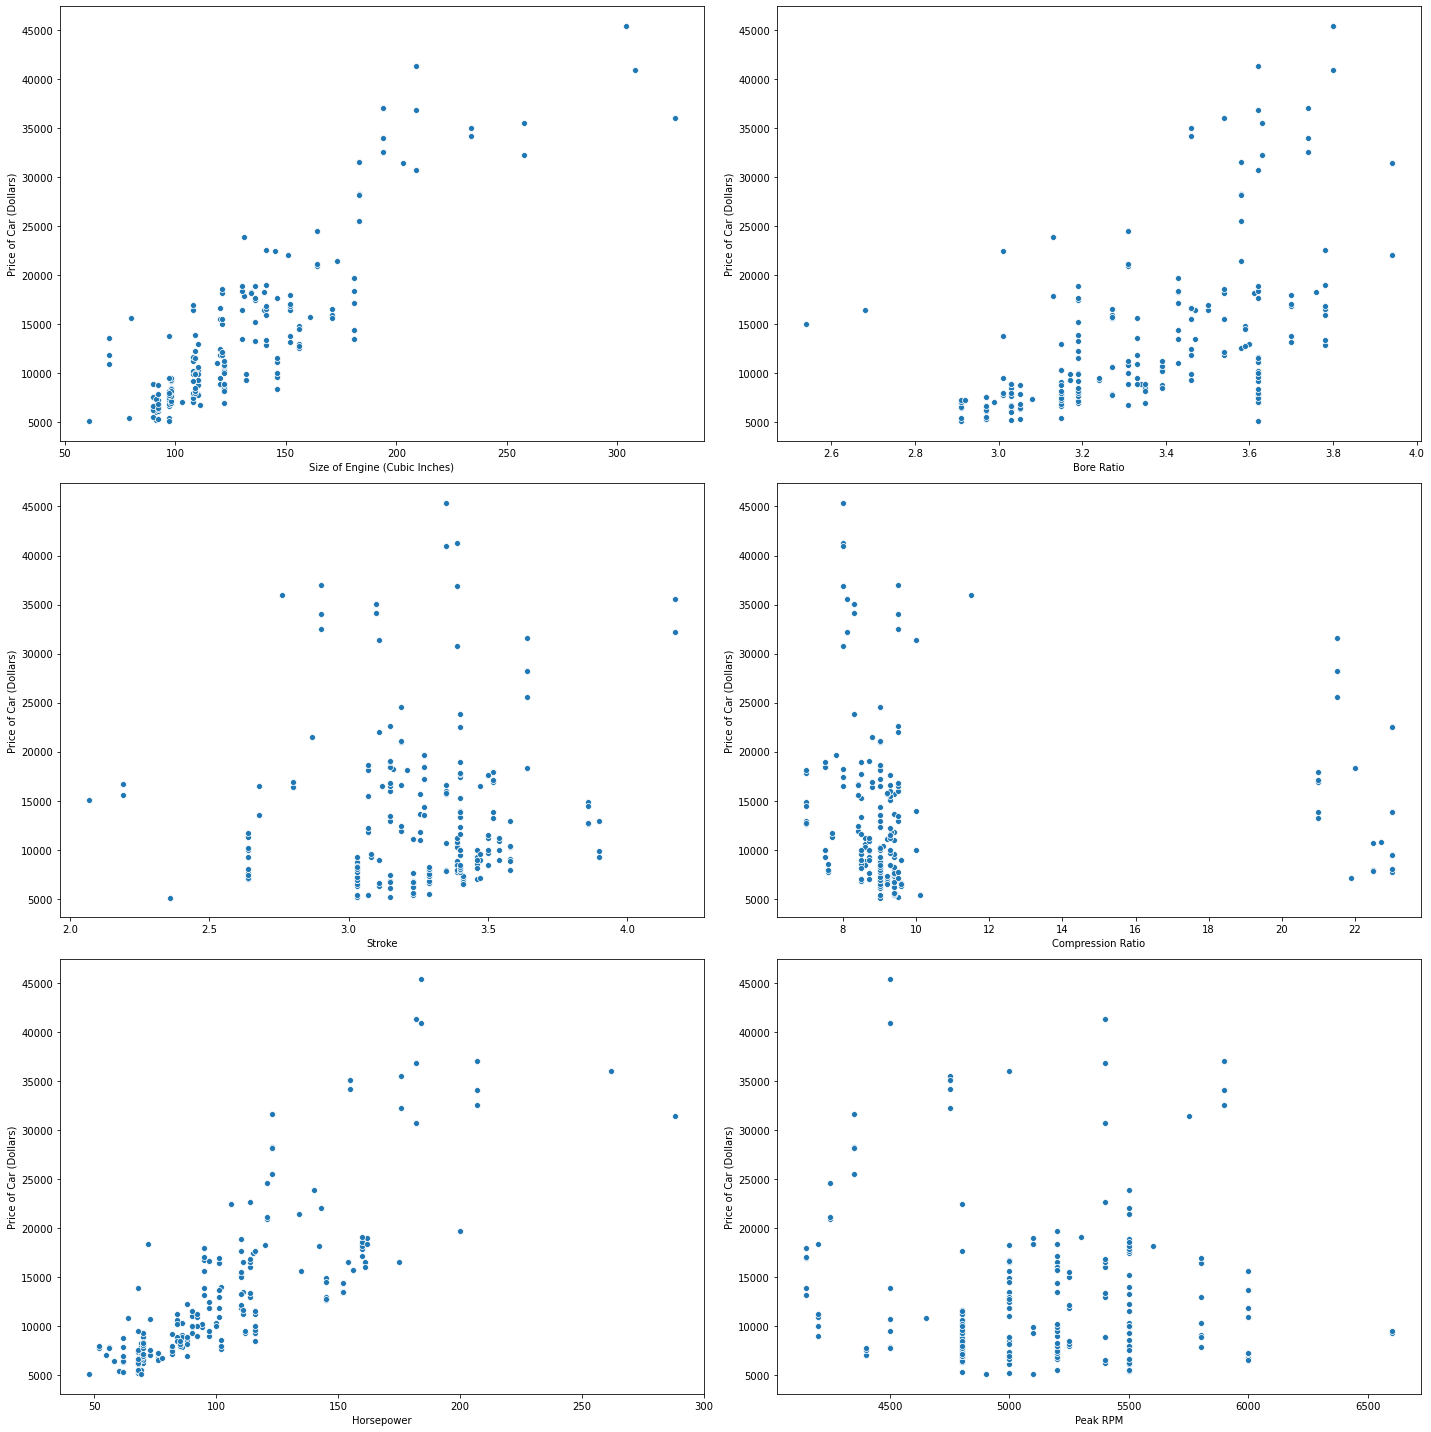

In [171]:
fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = data, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = data, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = data, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = data, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = data, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = data, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

In [172]:
data.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price', 'brand',
       'Brand_Price', 'brand_category'],
      dtype='object')

In [173]:
data['mileage'] = (data['citympg'] + data['highwaympg'])
data['mileage']=data['mileage'].apply(lambda x: x/2)

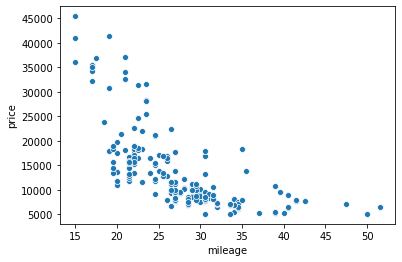

In [174]:
sns.scatterplot(x="mileage",y="price",data=data)

# Bivariant Analysis

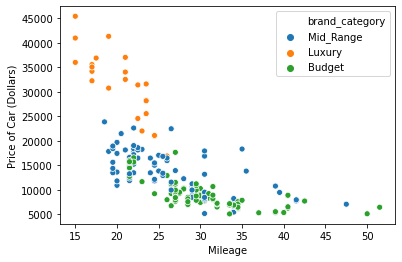

In [175]:
#Brand Category and Mileage
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

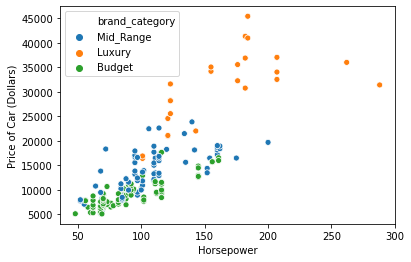

In [176]:
#Brand Category and Horsepower
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

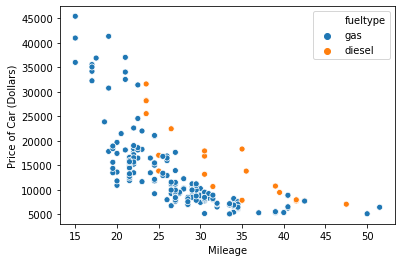

In [177]:
#mileage and fuel type
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = data)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

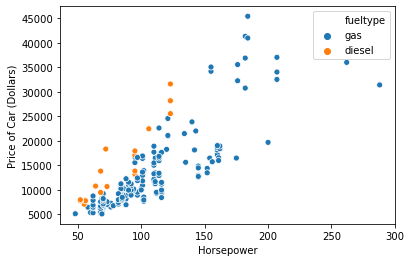

In [178]:
#Horse power and fuel type
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = data)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

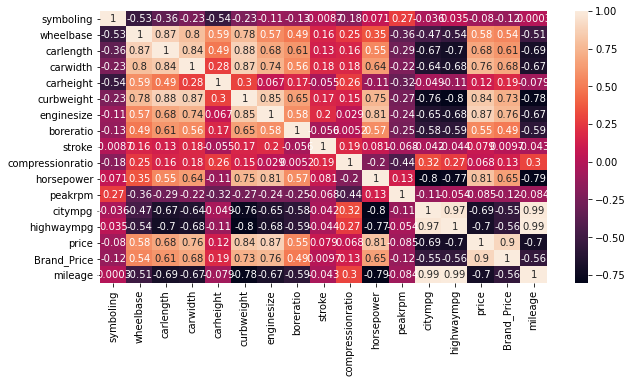

In [179]:
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot=True)

In [180]:
Cars = data[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'brand_category', 'mileage']]

In [181]:
Cars.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,24.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,24.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.5
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,27.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,20.0


<Figure size 1080x1080 with 0 Axes>

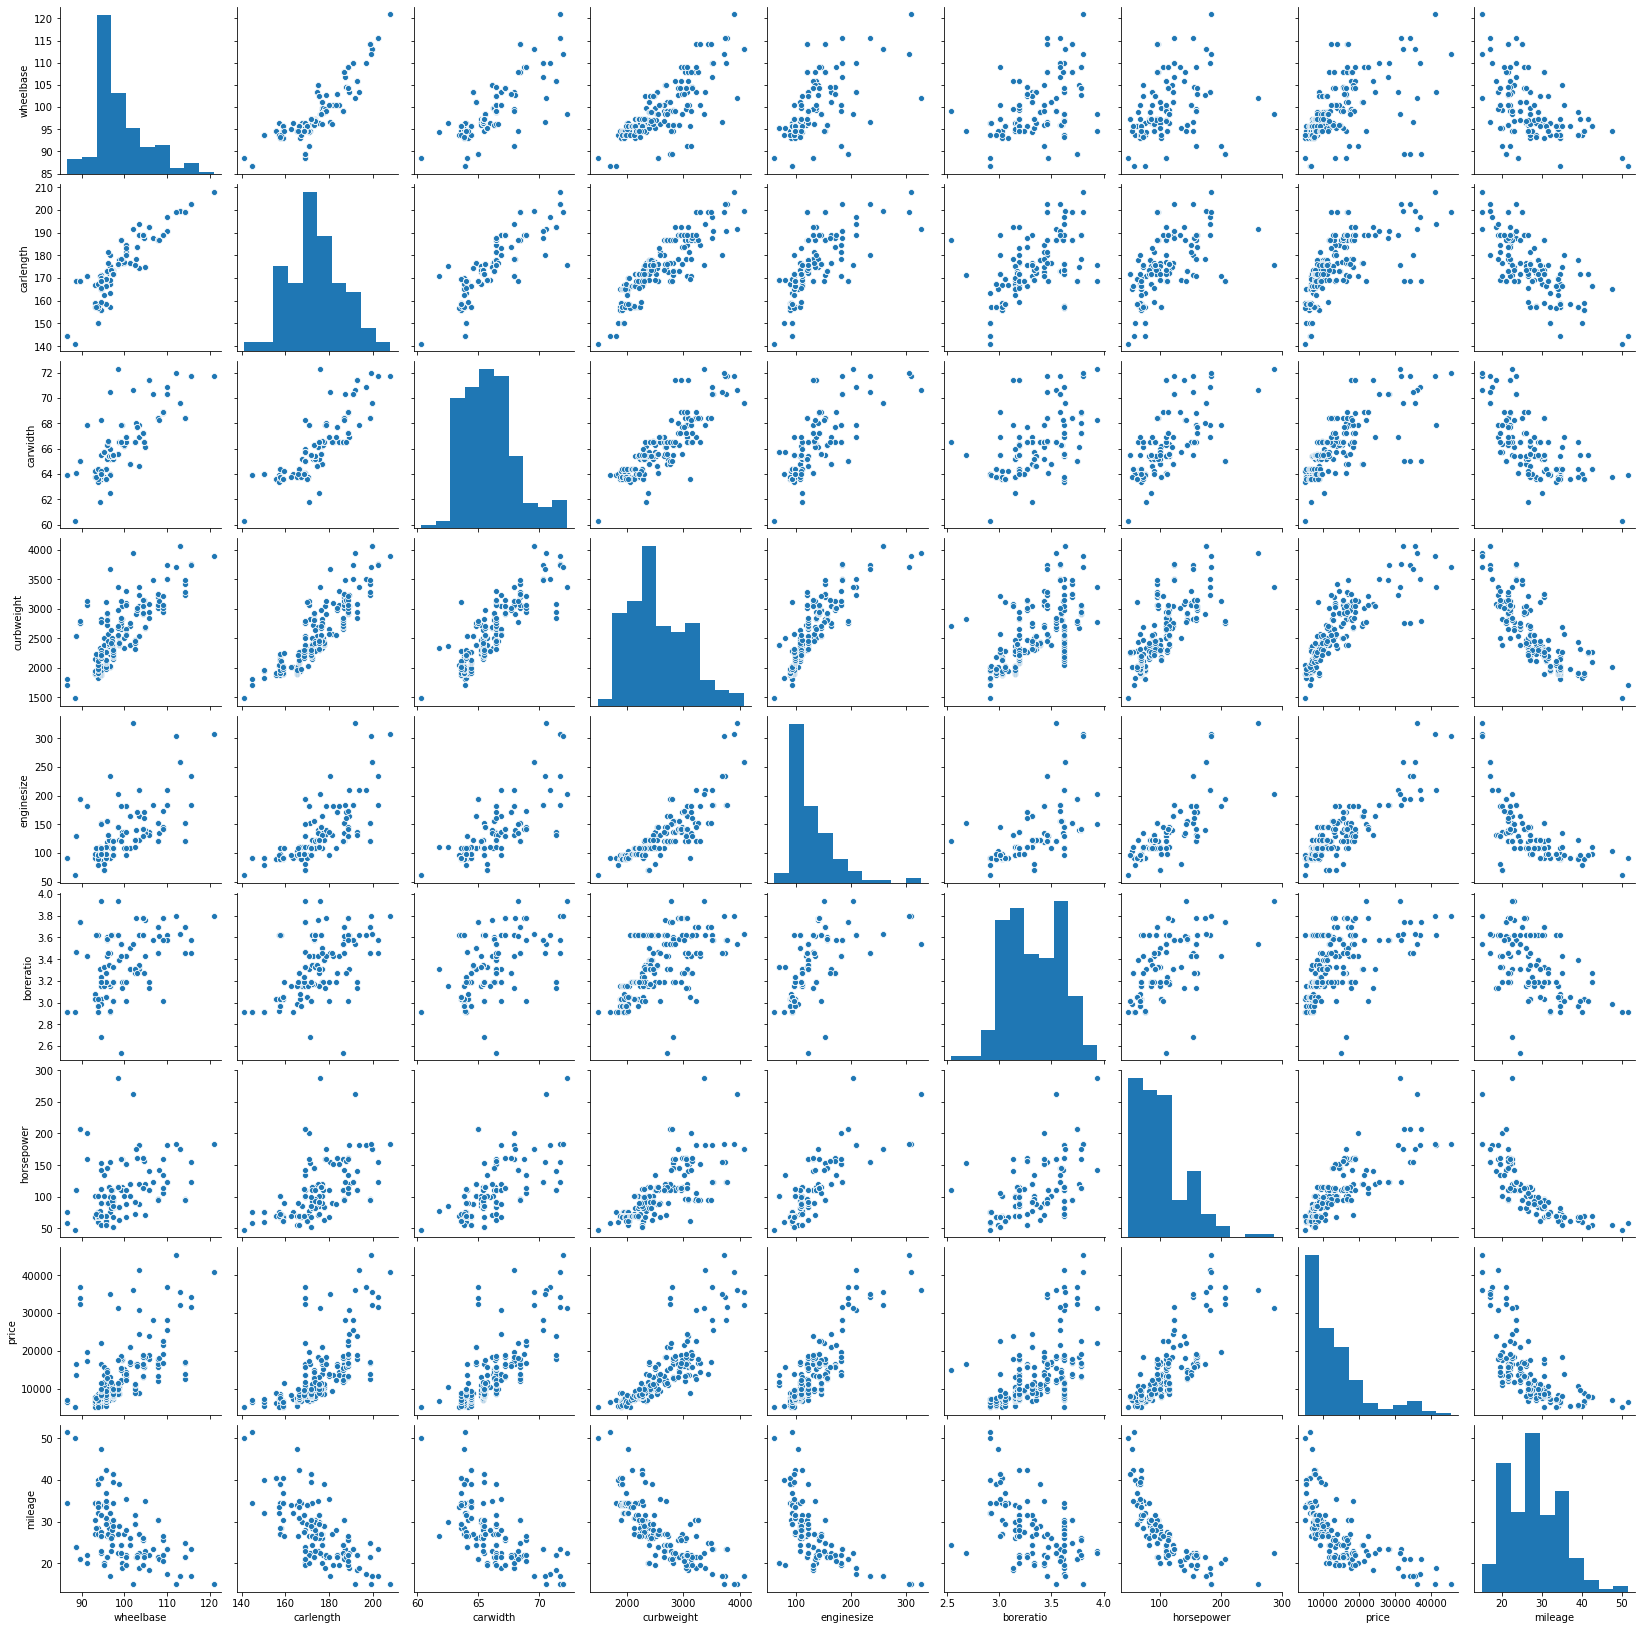

In [182]:
plt.figure(figsize=(15, 15))
sns.pairplot(Cars)
plt.show()

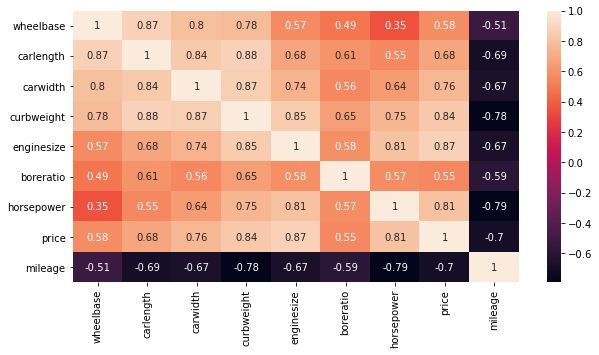

In [183]:
plt.figure(figsize=(10,5))
sns.heatmap(Cars.corr(),annot=True)

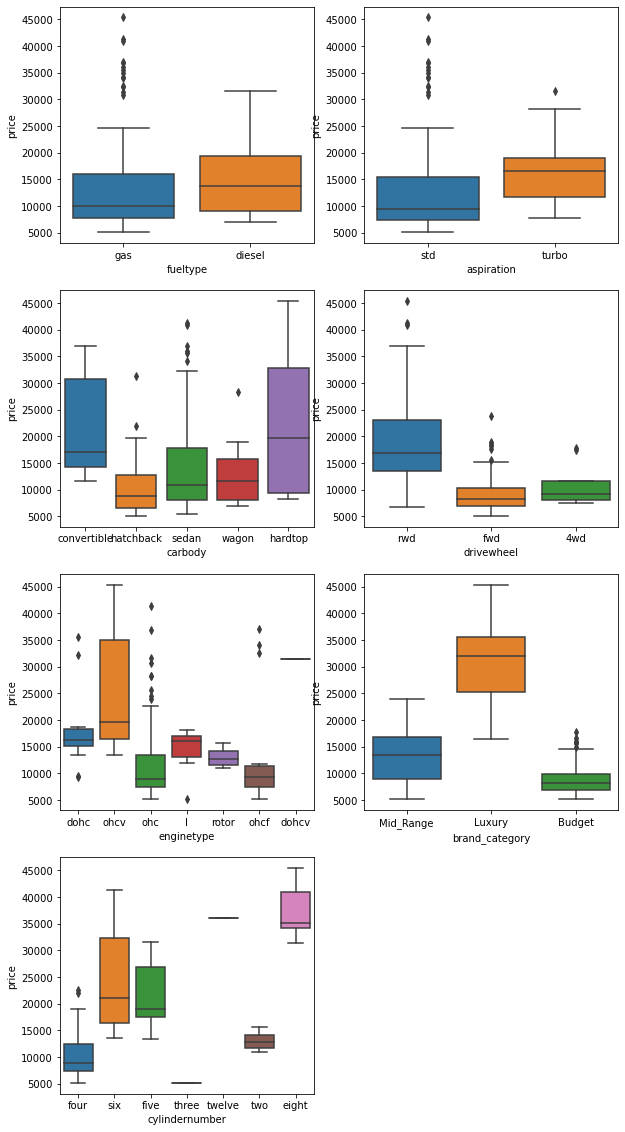

In [184]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = Cars)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = Cars)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = Cars)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = Cars)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = Cars)
plt.subplot(4,2,6)
sns.boxplot(x = 'brand_category', y = 'price', data = Cars)
plt.subplot(4,2,7)
sns.boxplot(x = 'cylindernumber', y = 'price', data = Cars)

plt.show()


In [185]:
Cars

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,13495.0,Mid_Range,24.0
1,gas,std,convertible,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,16500.0,Mid_Range,24.0
2,gas,std,hatchback,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,16500.0,Mid_Range,22.5
3,gas,std,sedan,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,13950.0,Mid_Range,27.0
4,gas,std,sedan,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,17450.0,Mid_Range,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,gas,std,sedan,rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,16845.0,Mid_Range,25.5
201,gas,turbo,sedan,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19045.0,Mid_Range,22.0
202,gas,std,sedan,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,21485.0,Mid_Range,20.5
203,diesel,turbo,sedan,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,22470.0,Mid_Range,26.5


In [186]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Cars['fueltype']=le.fit_transform(Cars['fueltype'])
Cars['aspiration']=le.fit_transform(Cars['aspiration'])
Cars['carbody']=le.fit_transform(Cars['carbody'])
Cars['drivewheel']=le.fit_transform(Cars['drivewheel'])

Cars['enginetype']=le.fit_transform(Cars['enginetype'])

Cars['cylindernumber']=le.fit_transform(Cars['cylindernumber'])
Cars['brand_category']=le.fit_transform(Cars['brand_category'])

In [187]:
Cars

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,brand_category,mileage
0,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,13495.0,2,24.0
1,1,0,0,2,88.6,168.8,64.1,2548,0,2,130,3.47,111,16500.0,2,24.0
2,1,0,2,2,94.5,171.2,65.5,2823,5,3,152,2.68,154,16500.0,2,22.5
3,1,0,3,1,99.8,176.6,66.2,2337,3,2,109,3.19,102,13950.0,2,27.0
4,1,0,3,0,99.4,176.6,66.4,2824,3,1,136,3.19,115,17450.0,2,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,3,2,109.1,188.8,68.9,2952,3,2,141,3.78,114,16845.0,2,25.5
201,1,1,3,2,109.1,188.8,68.8,3049,3,2,141,3.78,160,19045.0,2,22.0
202,1,0,3,2,109.1,188.8,68.9,3012,5,3,173,3.58,134,21485.0,2,20.5
203,0,1,3,2,109.1,188.8,68.9,3217,3,3,145,3.01,106,22470.0,2,26.5


In [188]:
y=Cars["price"]
x=Cars.drop(["price"],axis=1)


In [189]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)

In [190]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
rfe=RFE(LinearRegression(),n_features_to_select=10)

In [192]:
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=10)

In [193]:
x_train.columns[rfe.support_]

Index(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase',
       'carwidth', 'enginetype', 'cylindernumber', 'boreratio', 'horsepower'],
      dtype='object')

In [194]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', True, 1),
 ('aspiration', True, 1),
 ('carbody', True, 1),
 ('drivewheel', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 5),
 ('carwidth', True, 1),
 ('curbweight', False, 6),
 ('enginetype', True, 1),
 ('cylindernumber', True, 1),
 ('enginesize', False, 4),
 ('boreratio', True, 1),
 ('horsepower', True, 1),
 ('brand_category', False, 2),
 ('mileage', False, 3)]

In [195]:
correct_train_feats=x_train[['fueltype','aspiration','carbody','drivewheel',
                      'wheelbase','carwidth','enginetype','cylindernumber','boreratio','horsepower']]

In [196]:
correct_test_feats=x_test[['fueltype','aspiration','carbody','drivewheel',
                      'wheelbase','carwidth','enginetype','cylindernumber','boreratio','horsepower']]

In [197]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(correct_train_feats,y_train)

LinearRegression()

In [198]:
pred=model.predict(correct_test_feats)

In [199]:
from sklearn.metrics import *

In [200]:
r2_score(pred,y_test)

0.7406823939138172

In [201]:
train_pred=model.predict(correct_train_feats)

In [202]:
len(y_test)

62

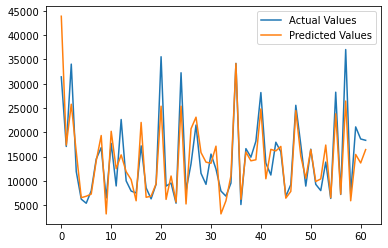

In [203]:
plt.plot([i for i in range(62)],y_test,label="Actual Values")
plt.plot([i for i in range(62)],pred,label="Predicted Values")
plt.legend()

In [204]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(correct_train_feats)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     61.99
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           5.83e-45
Time:                        15:10:35   Log-Likelihood:                -1357.7
No. Observations:                 143   AIC:                             2737.
Df Residuals:                     132   BIC:                             2770.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.113e+04   1.58e+04     -3.

In [205]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_lm
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,3206.92
6,carwidth,5.45
5,wheelbase,4.38
10,horsepower,3.96
4,drivewheel,2.22
1,fueltype,1.65
9,boreratio,1.61
8,cylindernumber,1.56
3,carbody,1.53
2,aspiration,1.47


## 5.45*carwidth+4.38*wheelbase+3.96*horsepower+2.22*drivewheel+
## fueltype*1.65+1.61*boreratio+cylindernumber*1.56+carbody*1.53+
## aspiration*1.47+enginetype*1.28